# Initialization

In [1]:
from read_write_tab import init_file, read_file, read_idx,read_max_idx, read_stable_idx
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as itp
import pandas as pd
import numpy as np
import copy

In [2]:
%matplotlib widget

In [3]:
def get_stable(df,key = 'SR830-1:Freq',n=5):
    df_copy = copy.deepcopy(df)
    df_copy['group'] = (df_copy[key]!=df_copy[key].shift()).cumsum()
    def last_n(group):
        # value_colums = group.select_dtypes(include='number').drop(columns='group')
        return group.tail(n).mean()
    def std_n(group):
        return group.tail(n).std()
    stable_df = df_copy.groupby([key,'group']).apply(last_n,include_groups=False).reset_index(drop=True)
    std_n = df_copy.groupby([key,'group']).apply(std_n,include_groups=False).reset_index(drop=True)
    return stable_df,std_n

##  data reading

Text(0, 0.5, 'Rxx(Ohm)')

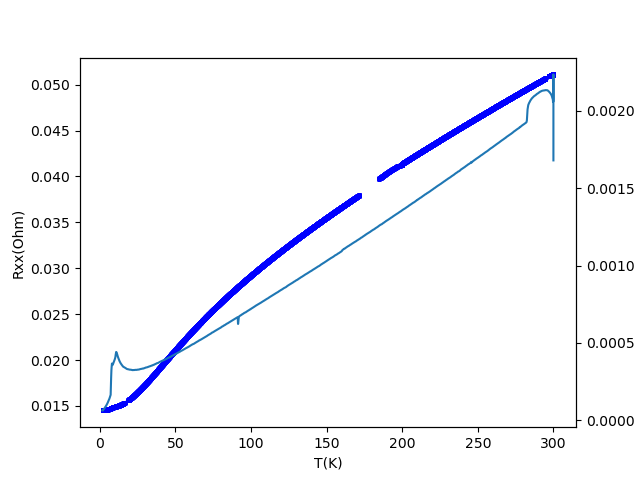

In [9]:
folder = 'C:/Data/Zhenhai/strainedEU-052925-S2'.replace('\\','/')
df_Tsweep = read_idx(folder,2)
df_Tsweep2 = read_idx(folder,4)
df_Tsweep3 = read_idx(folder,6)
df_Tsweep4 = read_idx(folder,9)
df_Tsweep5 = read_idx(folder,10)


# df_Tsweep2 = read_idx(folder,4)

df_lists = [
    df_Tsweep,
    # df_Tsweep2,
    # df_Tsweep3,
    df_Tsweep4,
    # df_Tsweep5
]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()


folder2 = 'C:/Data/Zhenhai/UnstrainedEU-052625'.replace('\\','/')
df_Tsweep_unstrained = read_idx(folder2,11)
cond = df_Tsweep_unstrained['sys:time'] > 0
ax2.plot(df_Tsweep_unstrained['PPMS:T_pm'][cond],
                # dfx['PPMS:T_pm'],
                 df_Tsweep_unstrained['SR830-2:X'][cond]/df_Tsweep_unstrained['KL6221:Iamp'][cond],
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
        )


         
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    cond = dfx['sys:time'] > 0
    l1,=ax.plot(
                # dfx['sys:time'][cond],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:T_pm'][cond],
                # dfx['PPMS:T_pm'],
                 dfx['SR830-2:X'][cond]/dfx['KL6221:Iamp'][cond],
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-b',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5
    )
    # l2,=ax2.plot(
    #             # dfx['sys:time'][cond],
    #             # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
    #             dfx['PPMS:T_pm'][cond],
    #     # dfx['SR830-1:X'][cond],
    #             # dfx['PPMS:T_pm'],
                
    #             # dfx['dev5793:0:R'],
    #             # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
    #             # dfx['AH:C_d'],
    #             # dfx['dev5793:0:R'],
    #             dfx['AH:C_d'][cond],
    
                
    #             '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5,color='red'
    # )
ax.set_xlabel('T(K)')
ax.set_ylabel('Rxx(Ohm)')
ax2.set_ylabel('Rxx(Ohm)')

# ax.plot(np.linspace(38,42,100),np.linspace(38,42,100))
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

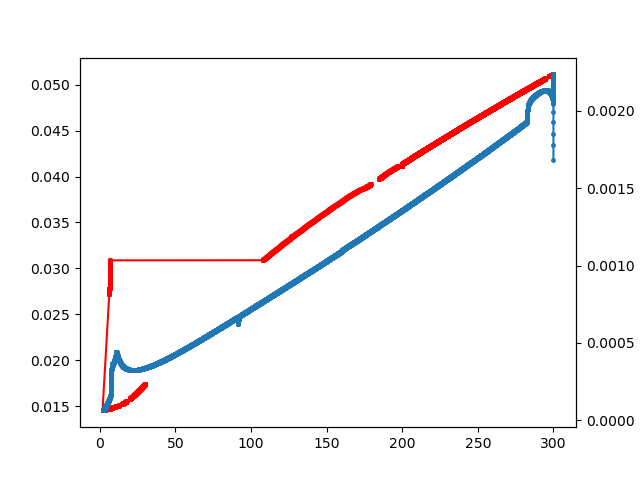

In [5]:
folder = 'C:/Data/Zhenhai/strainedEU-052925-S2'.replace('\\','/')
df_Tsweep = read_idx(folder,2)
df_Tsweep2 = read_idx(folder,4)
df_Tsweep3 = read_idx(folder,6)
df_Tsweep4 = read_idx(folder,7)


# df_Tsweep2 = read_idx(folder,4)

df_lists = [
    df_Tsweep,
    df_Tsweep2,
    # df_Tsweep3,
    df_Tsweep4
]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()

folder2 = 'C:/Data/Zhenhai/UnstrainedEU-052625'.replace('\\','/')
df_Tsweep_unstrained = read_idx(folder2,11)
cond = df_Tsweep_unstrained['sys:time'] > 0
ax2.plot(df_Tsweep_unstrained['PPMS:T_pm'][cond],
                # dfx['PPMS:T_pm'],
                 df_Tsweep_unstrained['SR830-2:X'][cond]/df_Tsweep_unstrained['KL6221:Iamp'][cond],
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)

for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    cond = dfx['sys:time'] > 0
    l1,=ax.plot(
                # dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:T_pm'][cond],
                # dfx['PPMS:T_pm'],
                 dfx['SR830-2:X'][cond]/dfx['KL6221:Iamp'][cond],
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-r',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5
    )
    # l2,=ax2.plot(
    #             # dfx['sys:time'],
    #             # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
    #             dfx['PPMS:T_pm'][cond],
    #     # dfx['SR830-1:X'][cond],
    #             # dfx['PPMS:T_pm'],
                
    #             # dfx['dev5793:0:R'],
    #             # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
    #             # dfx['AH:C_d'],
    #             # dfx['dev5793:0:R'],
    #             dfx['AH:C_d'][cond],
    
                
    #             '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5,color='red'
    # )
# ax.plot(np.linspace(38,42,100),np.linspace(38,42,100))
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

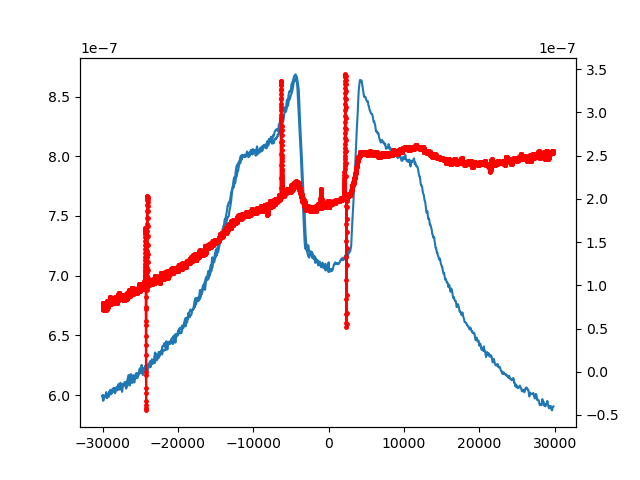

In [28]:
folder = 'C:/Data/Zhenhai/UnstrainedEU-052625'.replace('\\','/')
df_Bsweep = read_idx(folder,10)
df_lists = [
    df_Bsweep,
    # df_Tsweep2,
    # df_Tsweep3
]
# plt.clf()
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
cond = df_Bsweep['sys:time'] > 6500
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    l1,=ax.plot(
                # dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:H_pm'][cond],
                # dfx['PPMS:T_pm'],
                 dfx['SR830-1:X'][cond],
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=0
    )
    l2,=ax2.plot(
                # dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:H_pm'][cond],
        dfx['SR830-2:X'][cond],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5,color='red'
    )
# ax.plot(np.linspace(38,42,100),np.linspace(38,42,100))
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

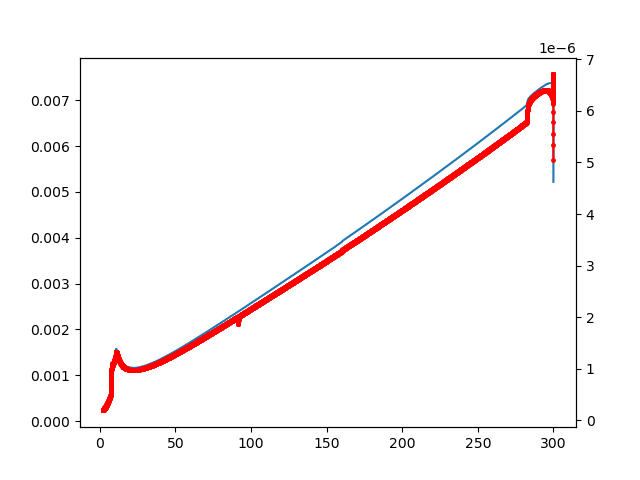

In [38]:
folder = 'C:/Data/Zhenhai/UnstrainedEU-052625'.replace('\\','/')
df_Tsweep = read_idx(folder,11)
df_lists = [
    df_Tsweep,
    # df_Tsweep2,
    # df_Tsweep3
]
# plt.clf()
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
cond = df_Tsweep['sys:time'] > 6500
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    l1,=ax.plot(
                # dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:H_pm'][cond],
                dfx['PPMS:T_pm'][cond],
                 dfx['SR830-1:X'][cond]/dfx['KL6221:Iamp'][cond],
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=0
    )
    l2,=ax2.plot(
                # dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:T_pm'][cond],
        dfx['SR830-2:X'][cond],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5,color='red'
    )

## Frequency sweep

In [25]:
df_lists = [df_fsweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['SR830-1:Freq'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:Y'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],'r-')
    # ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
# ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

NameError: name 'df_fsweep_stable' is not defined

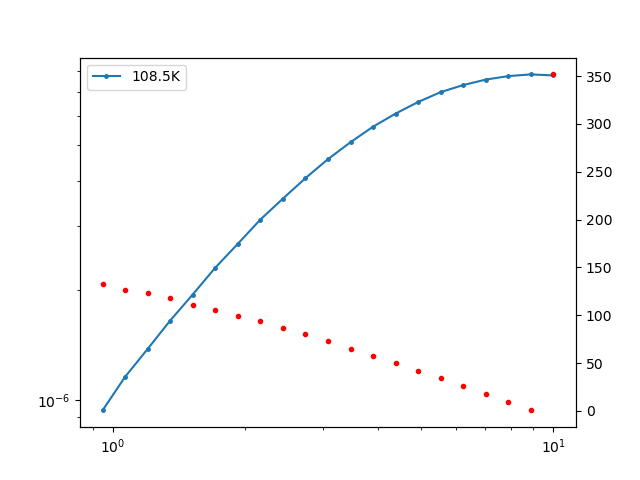

In [38]:
df_lists = [df_fsweepECE_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.loglog(
                dfx['SR830-1:Freq'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:R'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],'r-')
    # ax2.hlines([0],xmin=1,xmax=100)
    li,=ax2.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta']+180,'.r',label='%.1sK'%names_list[i],)
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
# ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

## Power sweep

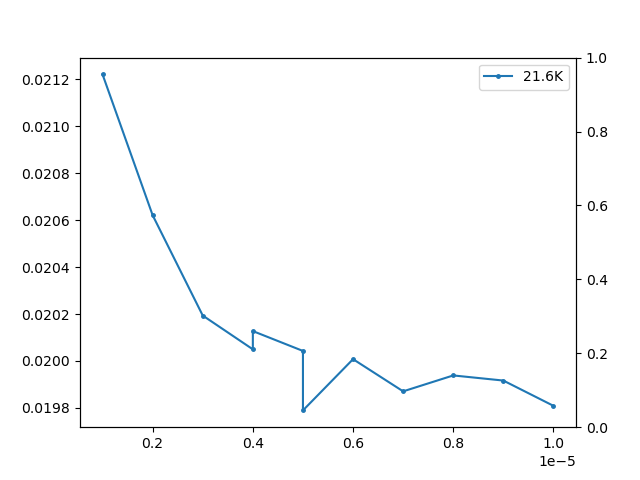

In [103]:
df_lists = [df_psweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['KL6221:Iamp'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:R']/dfx['KL6221:Iamp'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    # ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
# ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

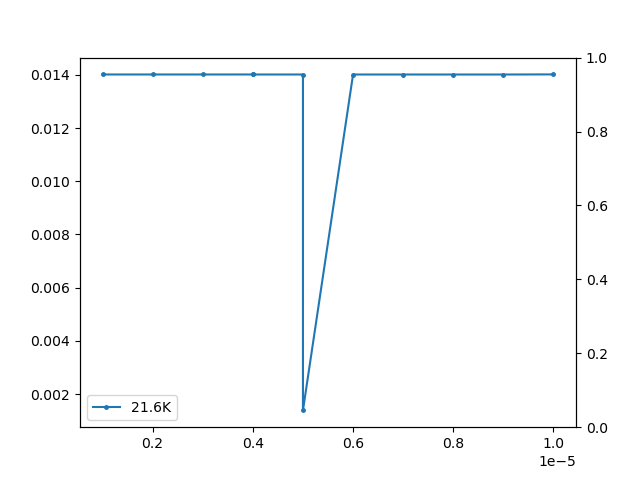

In [104]:
df_lists = [df_psweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['KL6221:Iamp'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['SR830-2:R'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    # ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
# ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

## Tsweep

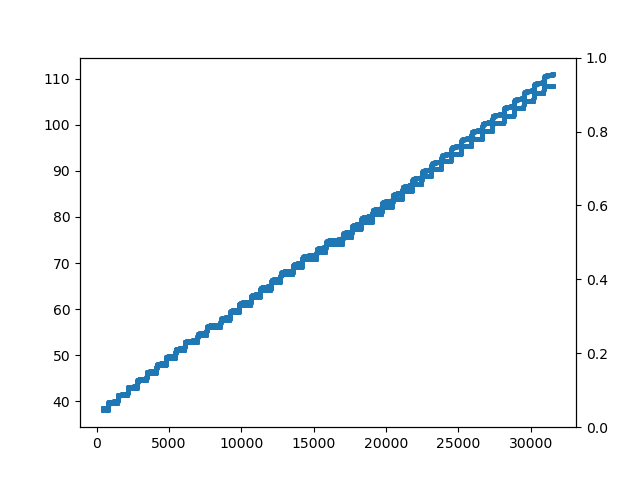

In [16]:
df_lists = [df_Tsweep]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    l1,=ax.plot(
                dfx['sys:time'],
                np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5
    )
    l2,=ax.plot(
                dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5,color=l1.get_color()
    )
# ax.plot(np.linspace(38,42,100),np.linspace(38,42,100))
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

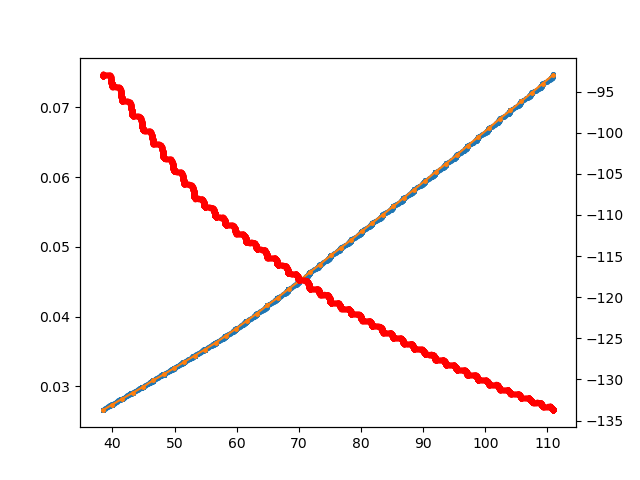

In [20]:
df_lists = [df_Tsweep,df_Tsweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                # dfx['sys:time'],
                np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
        
                1/(dfx['dev5793:0:R']/calib_TP(np.exp(revinpt(np.log(dfx['SR830-2:R']))))/dfx['SR830-1:R']),
                # dfx['dev5793:0:Y']/calib_TP(np.exp(revinpt(np.log(dfx['SR830-2:R']))))/500,
                # dfx['AH:C_d'],
                # dfx['dev5793:0:Y'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    ax2.plot(np.exp(revinpt(np.log(dfx['SR830-2:R']))),dfx['dev5793:0:Theta'],'r.')

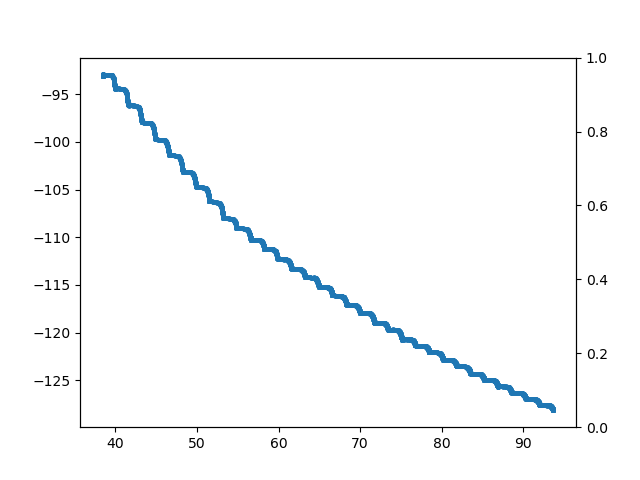

In [76]:
df_lists = [df_Tsweep]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
               np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                dfx['dev5793:0:Theta'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

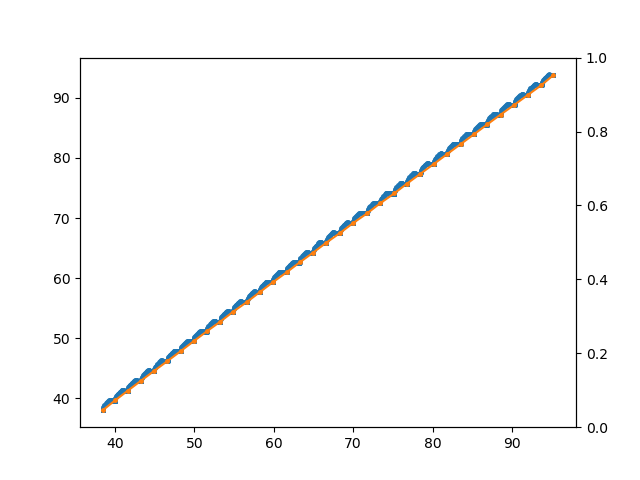

In [84]:
df_lists = [df_Tsweep,df_Tsweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['dev5793:0:R'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)

# Ni4310

##  data reading

In [33]:
folder = 'C:/QdPpms/Data/Software_ZH/Measurement_notebooks/data/Zhenhai/Ni4310S1-1stcd'
df_fsweep = read_idx(folder,2)
df_fsweep_stable,df_fsweep_var = get_stable(df_fsweep,key='KL6221:Freq',n=10)
df_psweep = read_idx(folder,8)
df_psweep_stable,df_psweep_var = get_stable(df_psweep,key='KL6221:Iamp',n=5)
df_Tsweep = read_idx(folder,8)
df_Tsweep_stable,df_Tsweep_var = get_stable(df_Tsweep[1000:],key='PPMS:SetTemp',n=30)
df_Tsweep1 = read_idx(folder,21)
df_TsweepLCR = read_idx(folder,24)
# df_Tswee1p_stable,df_Tsweep1_var = get_stable(df_Tsweep[1000:],key='PPMS:SetTemp',n=30)

C:\Users\ppms3user\AppData\Local\Temp\ipykernel_12232\1575093368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = (df[key]!=df[key].shift()).cumsum()


In [101]:
df_psweep.columns

Index(['sys:time', 'sys:real_time', 'PPMS:T_pm', 'PPMS:SetTemp', 'PPMS:H_pm',
       'PPMS:SetField', 'SR830-1:X', 'SR830-1:Y', 'SR830-1:R', 'SR830-1:Theta',
       'SR830-1:Freq', 'SR830-1:Amp', 'AH:C_d', 'RP100:setVolt1_now',
       'RP100:setVolt2_now', 'RP100:measVolt1', 'RP100:measVolt2',
       'RP100:Output1', 'RP100:Output2', 'SR830-2:X', 'SR830-2:Y', 'SR830-2:R',
       'SR830-2:Theta', 'dev5793:0:X', 'dev5793:0:Y', 'dev5793:0:R',
       'dev5793:0:Theta', 'dev5793:0:Freq', 'KL6221:Iamp', 'KL6221:Freq',
       'KL6221:Iac_on', 'group'],
      dtype='object')

## Frequency sweep

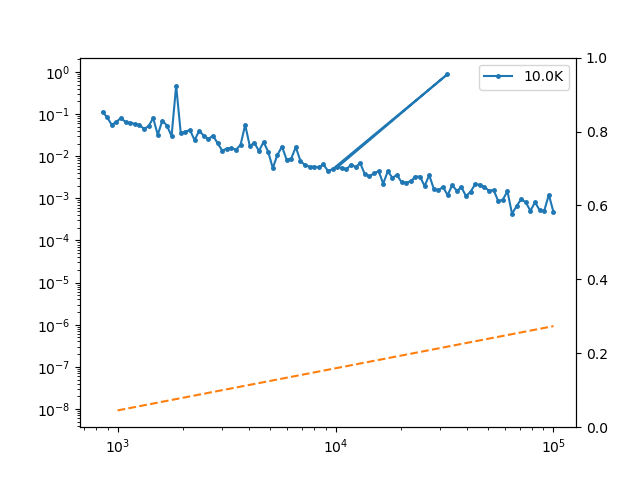

In [102]:
df_lists = [df_fsweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.loglog(
                dfx['SR830-1:Freq'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                df_fsweep_var['dev5793:0:R']/dfx['dev5793:0:R'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    # ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

## Power sweep

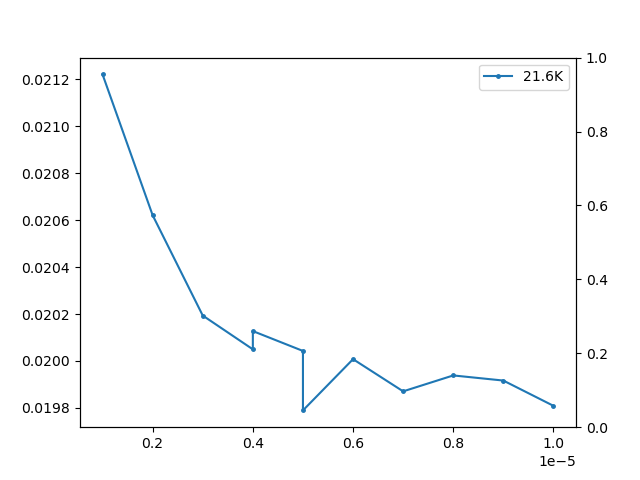

In [103]:
df_lists = [df_psweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['KL6221:Iamp'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:R']/dfx['KL6221:Iamp'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    # ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
# ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

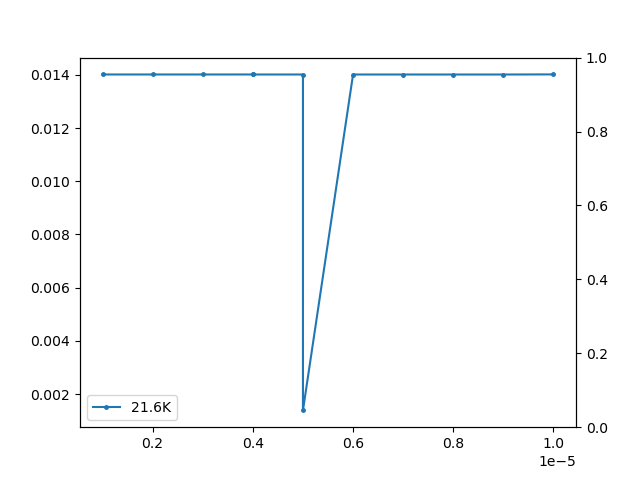

In [104]:
df_lists = [df_psweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['KL6221:Iamp'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['SR830-2:R'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    # ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
# ax.loglog(np.linspace(1e3,1e5,100),0.925e-11*np.linspace(1e3,1e5,100),'--')
ax.legend()

## Tsweep

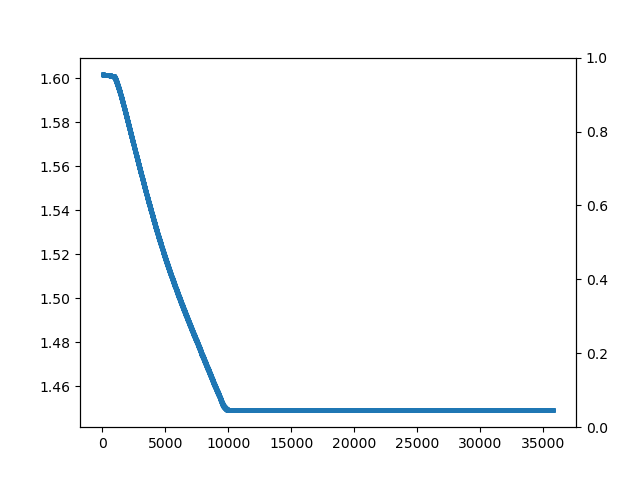

In [37]:
df_lists = [df_TsweepLCR]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['sys:time'],
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

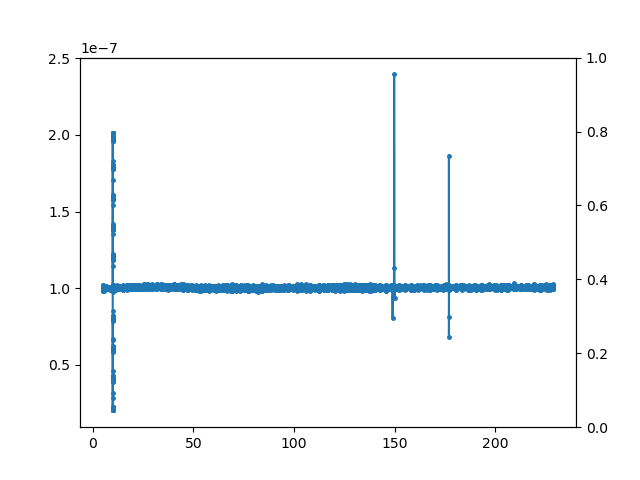

In [32]:
df_lists = [df_Tsweep]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                # dfx['sys:time'],
                np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['AH:C_d'],
                dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

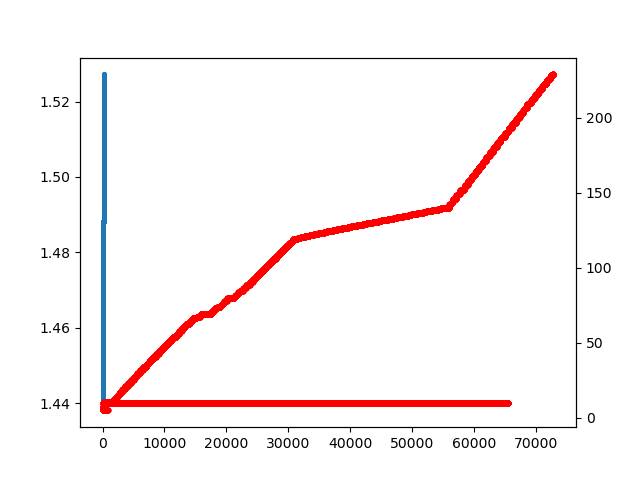

In [31]:
df_lists = [df_Tsweep]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
               np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                # dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
    
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    ax2.plot(dfx['sys:time'], np.exp(revinpt(np.log(dfx['SR830-2:R']))),'r.')

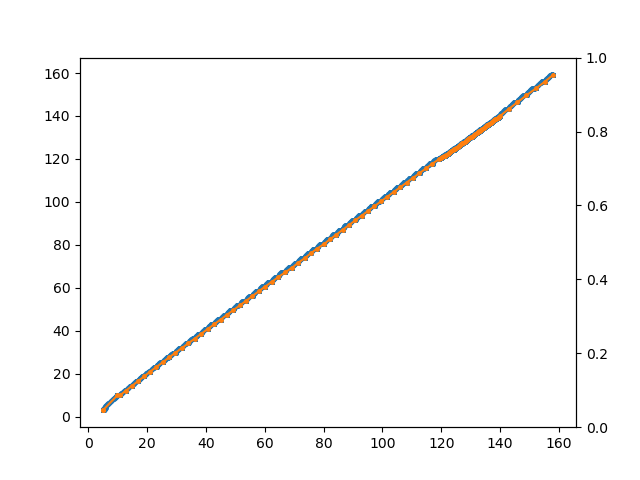

In [116]:
df_lists = [df_Tsweep,df_Tsweep_stable]
names_list = ['10K','10K-stable']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                np.exp(revinpt(np.log(dfx['SR830-2:R']))),
                dfx['PPMS:T_pm'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['dev5793:0:R'],
                # dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)

# FeGe1st

In [94]:
folder = 'C:/QdPpms/Data/Software_ZH/Measurement_notebooks/data/Zhenhai/FeGe1st'
df_Tsweep = read_idx(folder,49)
df_Tsweep_2 = read_idx(folder,51)
df_Tsweep_3 = read_idx(folder,53)
df_freq_sweep_70K = read_idx(folder,55)
df_freq_sweep_70K_2 = read_idx(folder,57)
df_power_sweep_70K = read_idx(folder,61)
# df_Tsweep = read_idx(folder,35)
df_Tsweep_stable,df_std_n = get_stable(df_Tsweep_3,key='PPMS:SetTemp',n=5)
df_fsweep_stable,df_fstd_n = get_stable(df_freq_sweep_70K_2,key='KL6221:Freq',n=5)
df_fsweep_stable_2,df_fstd_n_2 = get_stable(df_freq_sweep_70K,key='KL6221:Freq',n=5)
df_power_sweep_70K_stable,df_pstn = get_stable(df_power_sweep_70K,key='KL6221:Iamp',n=5)

In [95]:
df_Tsweep.columns

Index(['sys:time', 'sys:real_time', 'PPMS:T_pm', 'PPMS:SetTemp', 'PPMS:H_pm',
       'PPMS:SetField', 'SR830-1:X', 'SR830-1:Y', 'SR830-1:R', 'SR830-1:Theta',
       'SR830-1:Freq', 'SR830-1:Amp', 'AH:C_d', 'RP100:setVolt1_now',
       'RP100:setVolt2_now', 'RP100:measVolt1', 'RP100:measVolt2',
       'RP100:Output1', 'RP100:Output2', 'SR830-2:X', 'SR830-2:Y', 'SR830-2:R',
       'SR830-2:Theta', 'dev5793:0:X', 'dev5793:0:Y', 'dev5793:0:R',
       'dev5793:0:Theta', 'dev5793:0:Freq', 'KL6221:Iamp', 'KL6221:Freq',
       'KL6221:Iac_on'],
      dtype='object')

KeyError: 'KL6221:Iamp'

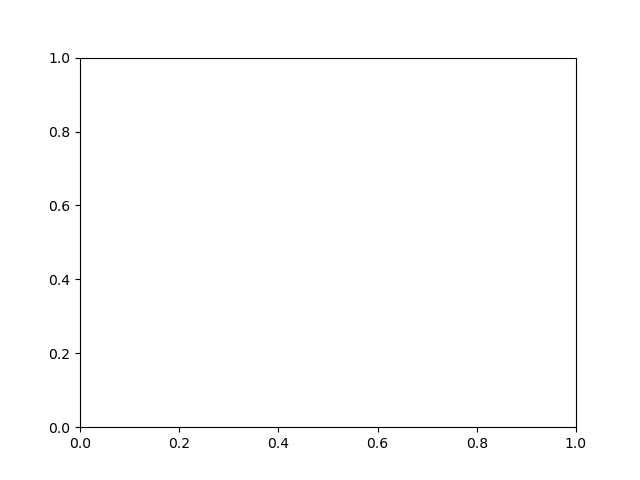

In [96]:
df_lists = [df_power_sweep_70K_stable]
names_list = ['?']
fig,ax = plt.subplots()
# ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                dfx['KL6221:Iamp']*dfx['SR830-1:R'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/500,
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    # ax2.hlines([0],xmin=1,xmax=100)
ax.set_xlabel('P(W)')
# ax.set_ylabel('Vac(V)')
ax.set_ylabel('Tac(K)')
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

In [ ]:
df_lists = [df_freq_sweep_70K,df_fsweep_stable,df_fsweep_stable_2
,df_freq_sweep_70K]
names_list = ['?']
fig,ax = plt.subplots()
ax2 = ax.twinx()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.loglog(
                dfx['KL6221:Freq'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:X']*dfx['KL6221:Freq'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    ax2.plot(dfx['KL6221:Freq'],dfx['dev5793:0:Theta'],)
    ax2.hlines([0],xmin=1,xmax=100)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

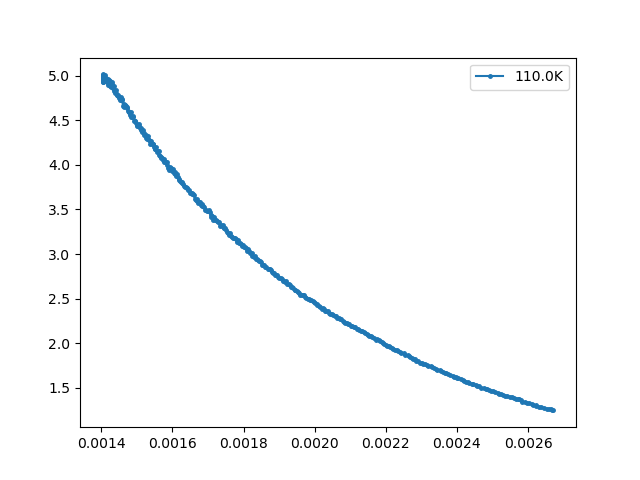

In [98]:
df_lists = [
    # df_Tsweep,df_Tsweep_2,df_Tsweep_3,
            df_Tsweep_stable]
names_list = ['?']
fig,ax = plt.subplots()

for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    x, y = dfx['SR830-2:R'],dfx['dev5793:0:R']
    # y_ipt = itp.UnivariateSpline(x, y,s=0.1)(x)
    # dy = np.gradient(y,x)
    li,=ax.plot(
                x,
                # dfx['SR830-2:R'],
                # dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dy,
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

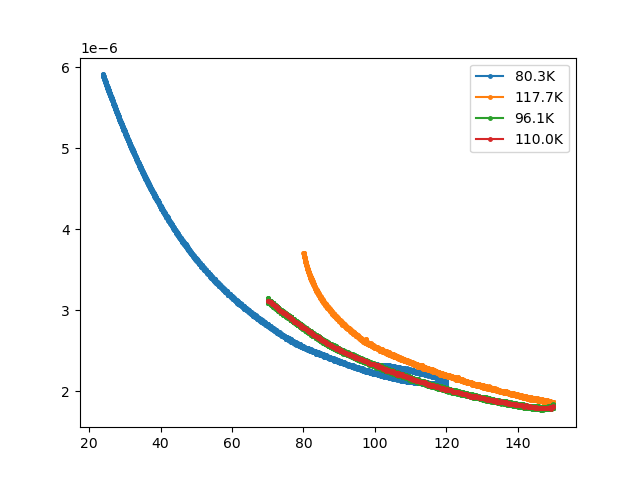

In [100]:
df_lists = [df_Tsweep,df_Tsweep_2,df_Tsweep_3,df_Tsweep_stable]
names_list = ['?']
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
                # dfx['SR830-2:R'],
                dfx['PPMS:T_pm'],
                
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                dfx['dev5793:0:R'],
                # dfx['AH:C_d'],
                
                
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=5)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

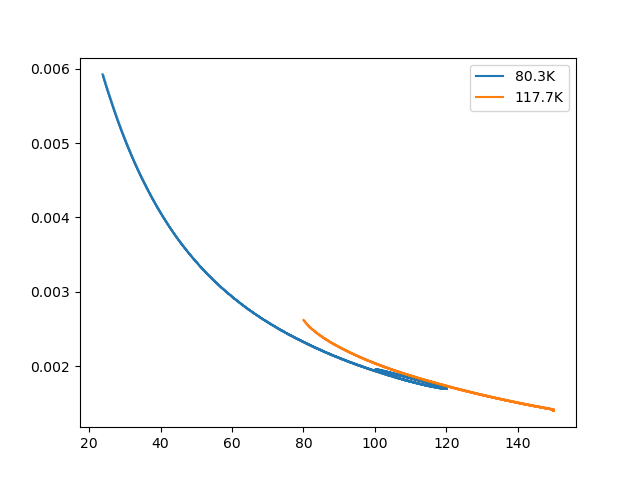

In [109]:
df_lists = [df_Tsweep,df_Tsweep_2]
names_list = ['?']
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(
            dfx['PPMS:T_pm'],
            
        
                # dfx['dev5793:0:R'],
                # 1/(dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']),
                # dfx['dev5793:0:X']/calib_TP(dfx['PPMS:T_pm']),
                # dfx['AH:C_d'],
            dfx['SR830-2:R'],
        
                '.-',label='%.1fK'%np.mean(dfx['PPMS:T_pm']),markersize=0.1)
    # li,=ax.plot(dfx['dev5793:0:Freq'],dfx['dev5793:0:Theta'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_8872\1616519130.py:15: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta T/P$')


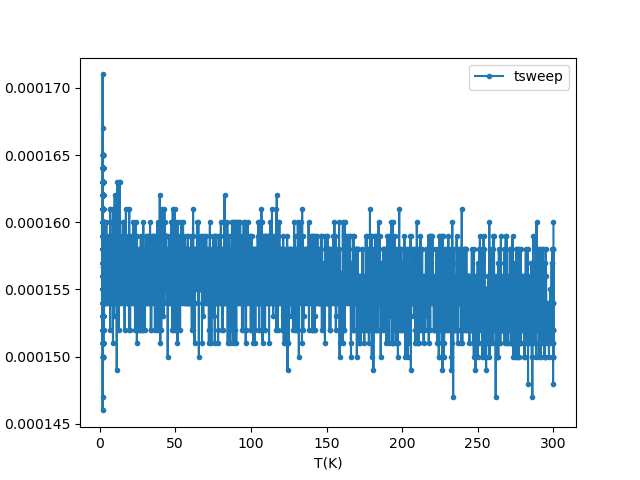

In [17]:
df_lists = [df_Tsweep]
names_list = ['tsweep','tsweep_new','tsweep_new2','tsweep_new3','tsweep_new4']
factor_list = [1,0.0653/0.09]
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(dfx['PPMS:T_pm'],
                # dfx['AH:C_d'],
                # factor_list[i]*dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R'],
                # dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R'],
                 dfx['AH:C_d'],
                # dfx['dev5793:0:R'],
                '.-',label=names_list[i])
ax.set_xlabel('T(K)')
ax.set_ylabel('$\Delta T/P$')
ax.legend()

In [28]:
df_Tsweep = read_idx(folder,21)
df_Tsweep_stable,df_Tsweep_var = get_stable(df_Tsweep,key='PPMS:SetTemp',n=20)
df_Tsweep_new = read_idx(folder,23)
df_Tsweep_new_stable,df_Tsweep_new_var = get_stable(df_Tsweep_new,key='PPMS:SetTemp',n=20)
df_Tsweep_new2 = read_idx(folder,25)
df_Tsweep_new2_stable,df_Tsweep_new2_var = get_stable(df_Tsweep_new2,key='PPMS:SetTemp',n=20)
df_Tsweep_new3 = read_idx(folder,27)
df_Tsweep_new3_stable,df_Tsweep_new3_var = get_stable(df_Tsweep_new3,key='PPMS:SetTemp',n=20)
df_Tsweep_new4 = read_idx(folder,31)
df_Tsweep_new4_stable,df_Tsweep_new4_var = get_stable(df_Tsweep_new4,key='PPMS:SetTemp',n=20)

C:\Users\ppms3user\AppData\Local\Temp\ipykernel_5288\881579506.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stable_df = df.groupby([key,'group']).apply(last_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_5288\881579506.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  std_n = df.groupby([key,'group']).apply(std_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\Te

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_5288\3956685534.py:14: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta T/P$')


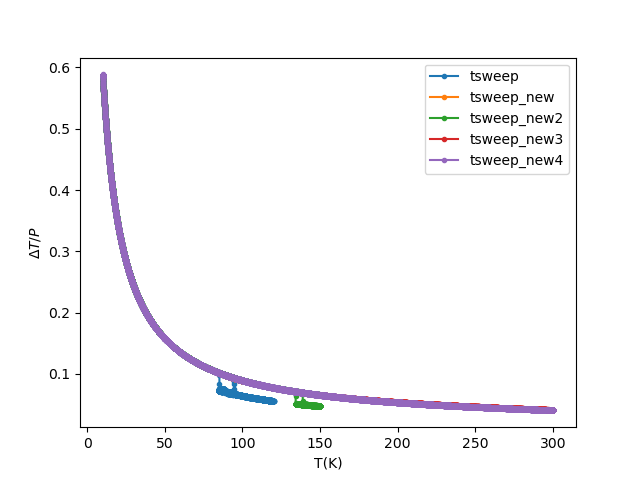

In [29]:
df_lists = [df_Tsweep,df_Tsweep_new,df_Tsweep_new2,df_Tsweep_new3,df_Tsweep_new4]
names_list = ['tsweep','tsweep_new','tsweep_new2','tsweep_new3','tsweep_new4']
factor_list = [1,0.0653/0.09]
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(dfx['PPMS:T_pm'],
                # dfx['AH:C_d'],
                # factor_list[i]*dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R'],
                 dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R'],
                # dfx['dev5793:0:R'],
                '.-',label=names_list[i])
ax.set_xlabel('T(K)')
ax.set_ylabel('$\Delta T/P$')
ax.legend()

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_5288\1645348891.py:11: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta T/P$')


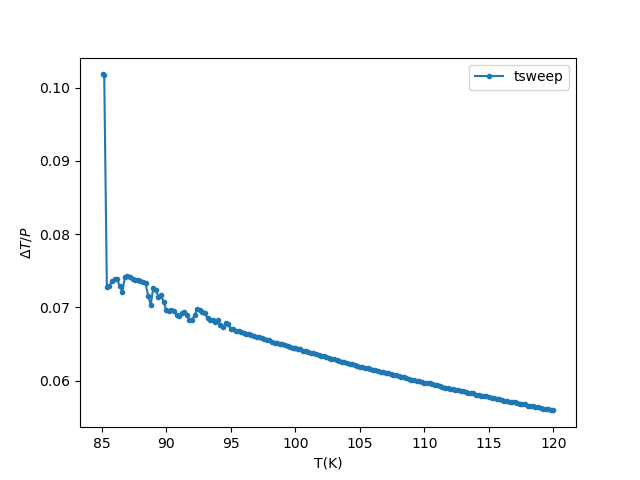

In [27]:
df_lists = [df_Tsweep_stable]
names_list = ['tsweep']
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.plot(dfx['PPMS:T_pm'],
                dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R'],
                # dfx['dev5793:0:R'],
                '.-',label=names_list[i])
ax.set_xlabel('T(K)')
ax.set_ylabel('$\Delta T/P$')
ax.legend()

In [24]:
df_1p8K_fsweep = read_idx(folder,5)
df_20K_fsweep = read_idx(folder,7)
df_30K_fsweep = read_idx(folder,9)
df_40K_fsweep = read_idx(folder,11)
df_90K_fsweep = read_idx(folder,13)
df_100K_fsweep = read_idx(folder,15)
df_110K_fsweep = read_idx(folder,17)


In [43]:
df_20K_fsweep_stable

,sys:time,sys:real_time,PPMS:T_pm,PPMS:SetTemp,PPMS:H_pm,PPMS:SetField,SR830-1:X,SR830-1:Y,SR830-1:R,SR830-1:Theta,...,SR830-2:X,SR830-2:Y,SR830-2:R,SR830-2:Theta,dev5793:0:X,dev5793:0:Y,dev5793:0:R,dev5793:0:Theta,dev5793:0:Freq,group
0,146.862772,1.734643e+09,20.00099,20.0,0.148,0.0,0.084729,0.000022,0.084729,0.0174,...,-0.007889,9.536820e-07,0.007889,179.994,1.160743e-07,-7.469885e-08,1.431970e-07,-38.671023,1.993975,2.0
1,271.212312,1.734643e+09,20.00058,20.0,0.148,0.0,0.084731,0.000032,0.084731,0.0252,...,-0.007878,9.536820e-07,0.007877,179.994,-1.385387e-08,-3.680273e-08,6.135762e-08,-39.556566,2.187568,3.0
2,393.540172,1.734644e+09,20.00019,20.0,0.148,0.0,0.084733,0.000031,0.084733,0.0240,...,-0.007870,9.536820e-07,0.007870,179.994,2.382030e-08,-7.357166e-08,9.610398e-08,-64.916726,2.399993,4.0
3,515.476133,1.734644e+09,20.00025,20.0,0.148,0.0,0.084733,0.000031,0.084733,0.0240,...,-0.007866,9.536820e-07,0.007865,179.994,-3.482567e-08,-1.787679e-08,7.364670e-08,-56.746328,2.633163,5.0
4,636.615208,1.734644e+09,20.00023,20.0,0.148,0.0,0.084733,0.000031,0.084733,0.0240,...,-0.007863,9.536820e-07,0.007863,179.994,-1.492697e-09,-5.478033e-08,6.456660e-08,-59.701440,2.888743,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,11918.833146,1.734655e+09,19.99992,20.0,0.148,0.0,0.106035,0.167418,0.198168,57.6516,...,-0.006637,4.768410e-07,0.006636,179.994,8.038668e-09,1.144399e-07,1.147220e-07,85.982078,14621.434424,98.0
98,12038.314488,1.734655e+09,19.99988,20.0,0.148,0.0,0.109504,0.182740,0.213043,59.0688,...,-0.006279,4.768410e-07,0.006279,179.994,9.320216e-09,1.140015e-07,1.143819e-07,85.326038,15985.690564,99.0
99,12162.391296,1.734655e+09,19.99988,20.0,0.148,0.0,0.113548,0.199481,0.218438,60.3498,...,-0.005865,4.768410e-07,0.005865,179.994,8.354113e-09,1.119252e-07,1.122372e-07,85.731176,17547.332674,100.0
100,12285.210027,1.734655e+09,19.99999,20.0,0.148,0.0,0.118272,0.217644,0.218438,61.4802,...,-0.005402,4.768410e-07,0.005401,179.994,7.825313e-09,1.131067e-07,1.133779e-07,86.041809,19253.889985,101.0


In [36]:
df_20K_fsweep_stable,df_20K_fsweep_stable_std = get_stable(df_20K_fsweep,n=10)
df_30K_fsweep_stable,df_30K_fsweep_stable_std = get_stable(df_30K_fsweep,n=10)
df_40K_fsweep_stable,df_40K_fsweep_stable_std = get_stable(df_40K_fsweep,n=10)
df_90K_fsweep_stable,df_90K_fsweep_stable_std = get_stable(df_90K_fsweep,n=10)
df_100K_fsweep_stable,df_100K_fsweep_stable_std = get_stable(df_100K_fsweep,n=10)
df_110K_fsweep_stable,df_110K_fsweep_stable_std = get_stable(df_110K_fsweep,n=10)

# df_90K_fsweep = read_idx(folder,13)
# df_100K_fsweep = read_idx(folder,15)
# df_110K_fsweep = read_idx(folder,17)

C:\Users\ppms3user\AppData\Local\Temp\ipykernel_1132\624629119.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stable_df = df.groupby([key,'group']).apply(last_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_1132\624629119.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  std_n = df.groupby([key,'group']).apply(std_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\Te

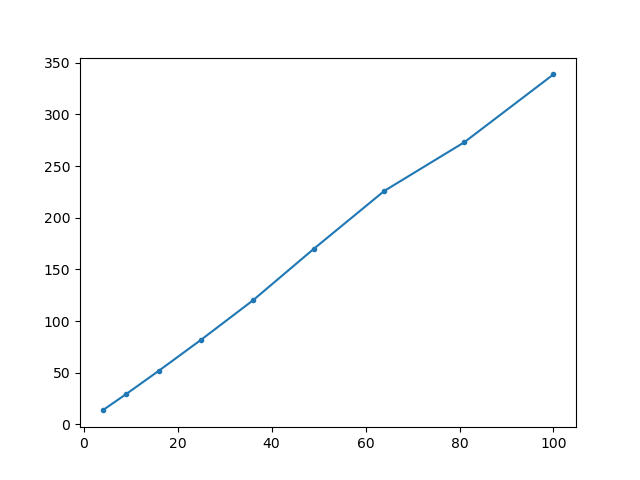

In [53]:
df_powersweep = pd.DataFrame(dict({'dev5793:0:Amp':np.array([2,3,4,5,6,7,8,9,10]),
                                   'dev5793:0:R':np.array([13.6,29.3,52,82,120,170,226,273.,338.7])}))
fig,ax = plt.subplots()
ax.plot(df_powersweep['dev5793:0:Amp']**2,df_powersweep['dev5793:0:R'],'.-')


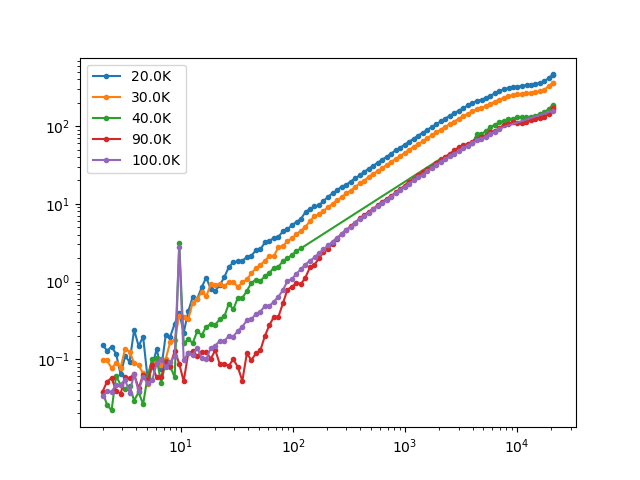

In [44]:
df_lists = [df_30K_fsweep_stable,df_40K_fsweep_stable,df_90K_fsweep_stable,df_100K_fsweep_stable,df_110K_fsweep_stable]
names_list = [20,30,40,90,100,110]
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    # print(names_list[i])
    li,=ax.loglog(dfx['dev5793:0:Freq'],dfx['dev5793:0:R']/calib_TP(dfx['PPMS:T_pm'])/dfx['SR830-1:R']/dfx['SR830-1:R']*dfx['SR830-1:Freq'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

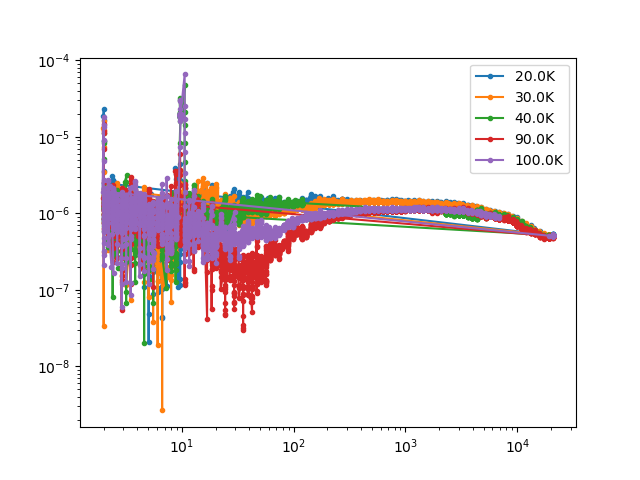

In [55]:
df_lists = [df_30K_fsweep,df_40K_fsweep,df_90K_fsweep,df_100K_fsweep,df_110K_fsweep]
names_list = [20,30,40,90,100,110]
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    li,=ax.loglog(dfx['dev5793:0:Freq'],dfx['dev5793:0:R']/dfx['SR830-1:R'],'.-',label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

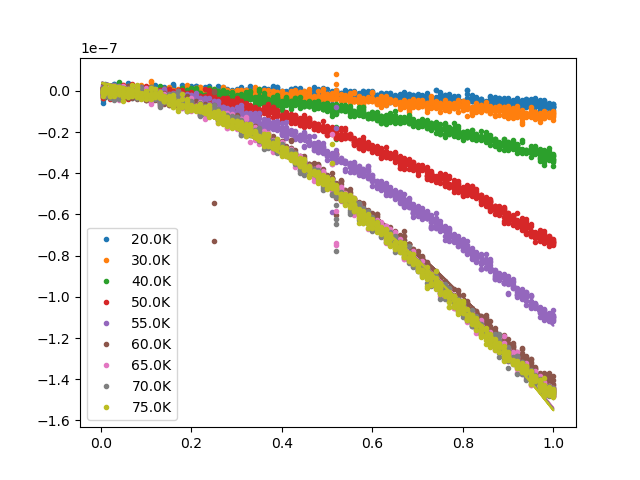

In [33]:
def parab_func(x,a,b,c):
    return a*x**2+b*x+c
df_lists = [df_20K,df_30K,df_40K,df_50K,df_55K,df_60K,df_65K,df_70K,df_75K]
names_list = [20,30,40,50,55,60,65,70,75]
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    li,=ax.plot(dfx['SR830-2:Amp'],dfx['SR830-1:Y'],'.',label='%.1fK'%names_list[i])
    para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()


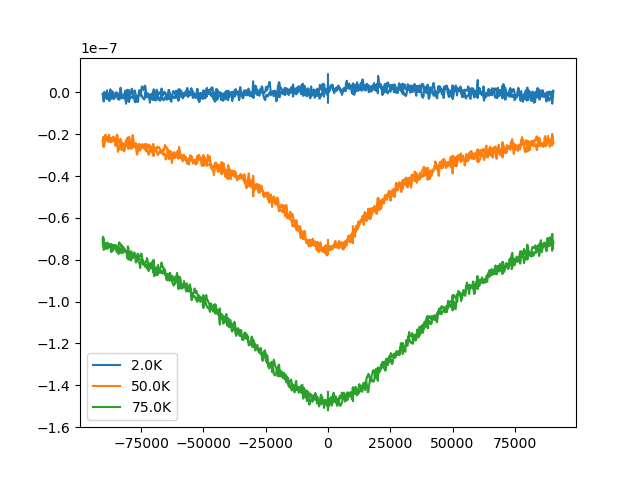

In [13]:
def parab_func(x,a,b,c):
    return a*x**2+b*x+c
df_lists = [df_M2,df_M50,df_M75]
names_list = [2,50,75]
fig,ax = plt.subplots()
for i, dfx in enumerate(df_lists):
    li,=ax.plot(dfx['PPMS:H_pm'],dfx['SR830-1:Y'],label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()


In [21]:
from read_write_ppms import read_file as read_file_pm

In [22]:
ref_file = 'C:/QdPpms/Data/ETO/EJCheng/20241210/EuSi-D8/EJC044-EuSi_FIB-D8_B-along_a_CH1-Ryx_CH2-Rxx_RT_current-0p1mA_TMR_01.dat'

In [23]:
df_ref = read_file_pm(ref_file)

In [24]:
df_ref.columns

Index(['Comment', 'Time Stamp (s)', 'Temperature (K)', 'Field (Oe)',
       'Sample Position (deg)', 'Chamber Pressure (Torr)',
       'Resistance Ch1 (Ohms)', 'Resistance Std. Dev. Ch1 (Ohms)',
       'Phase Angle Ch1 (deg)', 'I-V Current Ch1 (mA)', 'I-V Voltage Ch1 (V)',
       'Frequency Ch1 (Hz)', 'Averaging Time Ch1 (s)', 'AC Current Ch1 (mA)',
       'DC Current Ch1 (mA)', 'Voltage Ampl Ch1 (V)',
       'In Phase Voltage Ampl Ch1 (V)', 'Quadrature Voltage Ch1 (V)',
       'AC Voltage Ch1 (V)', 'DC Voltage Ch1 (V)', 'Current Ampl Ch1 (mA)',
       'In Phase Current Ch1 (mA)', 'Quadrature Current Ch1 (mA)', 'Gain Ch1',
       '2nd Harmonic Ch1 (dB)', '3rd Harmonic Ch1 (dB)',
       'Resistance Ch2 (Ohms)', 'Resistance Std. Dev. Ch2 (Ohms)',
       'Phase Angle Ch2 (deg)', 'I-V Current Ch2 (mA)', 'I-V Voltage Ch2 (V)',
       'Frequency Ch2 (Hz)', 'Averaging Time Ch2 (s)', 'AC Current Ch2 (mA)',
       'DC Current Ch2 (mA)', 'Voltage Ampl Ch2 (V)',
       'In Phase Voltage Ampl Ch2 

In [25]:
import numpy as np
def split_by_values(df,col_names,stable_tol):
    idxes = [[]]
    values = []
    for i in range(len(df)-1):
        idxes[-1].append(i)
        if abs(df[col_names][i+1]-df[col_names][i]) > stable_tol:
            values.append(np.mean(df[col_names][idxes[-1]]))
            idxes.append([]) 
            continue
        
    return idxes, values

In [26]:
stable_indexes, stable_values = split_by_values(df_ref,'Temperature (K)',0.1)

In [27]:
stable_values

[1.9999842322335024,
 5.999994860406092,
 10.000009263959392,
 20.000038305299906,
 30.000014185972706,
 40.000027062182745,
 50.00003728974929,
 60.000104790609136,
 75.00005765973826]

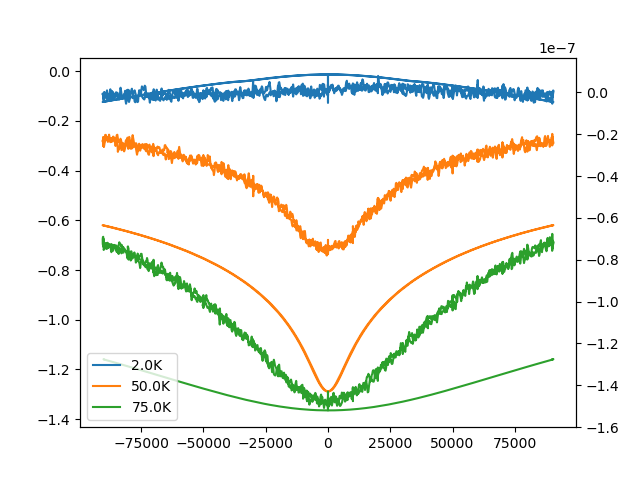

In [28]:
ref_indexes = [0,-3,-1]
# df_lists = [df_M2.]
fig,axe= plt.subplots()
df_lists = [df_M2,df_M50,df_M75]
             # 50,75]
names_list = [2,50,75]
# fig,ax = plt.subplots()
ax = axe.twinx()
for i, dfx in enumerate(df_lists):
    l1, = axe.plot(df_ref['Field (Oe)'][stable_indexes[ref_indexes[i]]],-df_ref['Resistance Ch2 (Ohms)'][stable_indexes[ref_indexes[i]]])
    li,=ax.plot(dfx['PPMS:H_pm'],dfx['SR830-1:Y'],label='%.1fK'%names_list[i],color=l1.get_color())
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
ax.legend()

In [60]:
dfx['SR830-1:Y']/spl(dfx['PPMS:H_pm'])

0       -4.938314e-08
1       -6.008827e-08
2       -1.726680e-08
3       -8.633399e-09
4       -7.597391e-09
             ...     
13520   -1.049824e-07
13521   -8.667905e-08
13522   -5.180040e-09
13523   -4.834704e-08
13524   -8.184453e-08
Name: SR830-1:Y, Length: 13525, dtype: float64

In [62]:
(dfx['SR830-1:Y']/spl(dfx['PPMS:H_pm']))[0]

-1.0953009887119689e-07

In [70]:
np.where(dfx['PPMS:H_pm']==max(dfx['PPMS:H_pm']))[0]

array([545], dtype=int64)

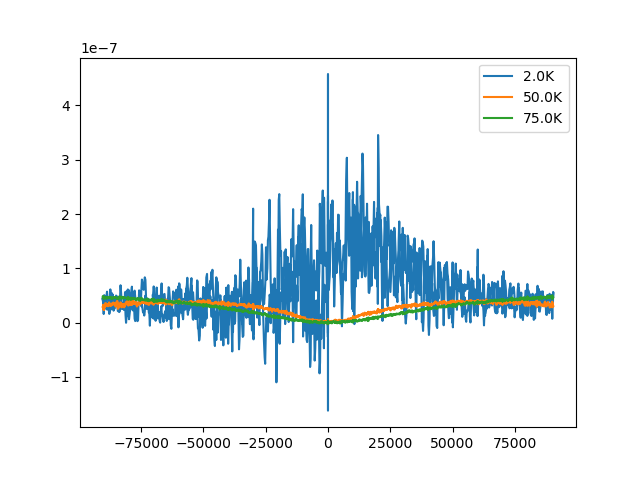

In [73]:
ref_indexes = [0,-3,-1]
# df_lists = [df_M2.]
fig,axe= plt.subplots()
df_lists = [df_M2,df_M50,df_M75]
             # 50,75]
names_list = [2,50,75]
# fig,ax = plt.subplots()
# ax = axe.twinx()
for i, dfx in enumerate(df_lists):
    x,y=df_ref['Field (Oe)'][stable_indexes[ref_indexes[i]]],df_ref['Resistance Ch2 (Ohms)'][stable_indexes[ref_indexes[i]]]
    # print(y)
    x,y=[list(t) for t in zip(*sorted(zip(x,y)))]
    new_x,new_y = [],[]
    for x1,y1 in zip(x,y):
        if  not np.isnan(y1):
            new_x.append(x1)
            new_y.append(y1)
    # print(new_y)
    spl = itp.UnivariateSpline(np.array(new_x),np.array(new_y))
    li,=axe.plot(dfx['PPMS:H_pm'],dfx['SR830-1:Y']/spl(dfx['PPMS:H_pm'])-(dfx['SR830-1:Y']/spl(dfx['PPMS:H_pm']))[np.where(dfx['PPMS:H_pm']==
                                                                                                                           -min(abs(dfx['PPMS:H_pm'])))[0][0]],label='%.1fK'%names_list[i])
    # para,para_cov = opt.curve_fit(parab_func,dfx['SR830-2:Amp'],dfx['SR830-1:Y'])
    # ax.plot(dfx['SR830-2:Amp'],parab_func(dfx['SR830-2:Amp'],*para),color=li.get_color())
axe.legend()

In [22]:
df_mfli_3K = read_idx(folder,470)
df_mfli_3K_stable,df_mfli_3K_std = get_stable(df_mfli_3K)

df_mfli_1p8K = read_idx(folder,499)
df_mfli_1p8K_stable,df_mfli_1p8K_std = get_stable(df_mfli_1p8K)

df_mfli_anneal = read_idx(folder,484)

df_T_sweep = read_idx(folder,503)
df_T_sweep_stable,df_T_sweep_std = get_stable(df_T_sweep,key='PPMS:SetTemp',n=40)
# df_mfli_anneal_stable = get_stable(df_mfli_anneal,key='SR830-1:Amp',n=20)

C:\Users\ppms3user\AppData\Local\Temp\ipykernel_10092\624629119.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stable_df = df.groupby([key,'group']).apply(last_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_10092\624629119.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  std_n = df.groupby([key,'group']).apply(std_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\

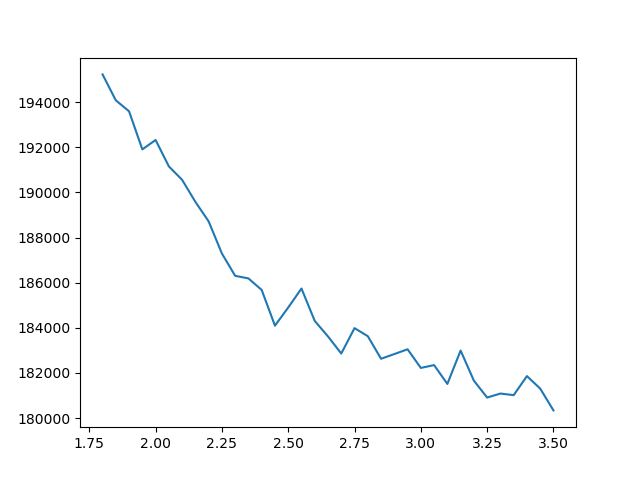

In [25]:
fig,ax = plt.subplots()
ax.plot(df_T_sweep_stable['PPMS:SetTemp'],1/df_T_sweep_stable['dev5793:0:R'])

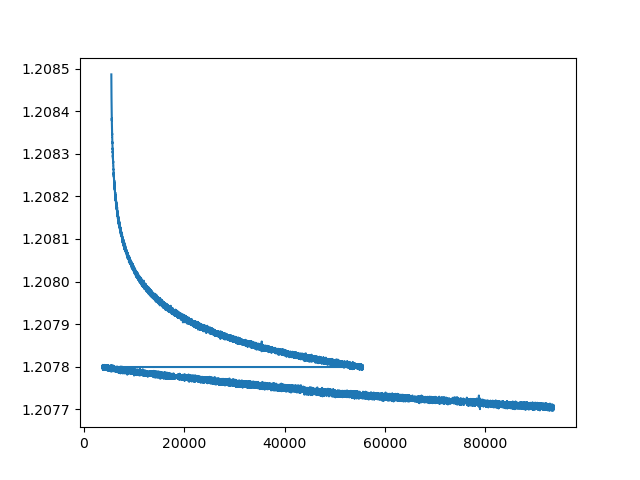

In [7]:
fig,ax = plt.subplots()
ax.plot(df_mfli_1p8K['sys:time'],df_mfli_1p8K['AH:C_d'])

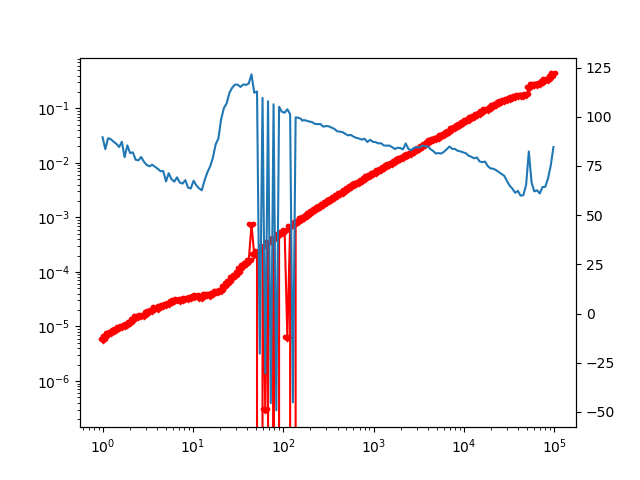

In [18]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
# ax.plot(df_mfli_3K['sys:time'],
#         # df_mfli_3K['PPMS:T_pm'])
#         df_mfli_3K['dev5793:0:Y']*df_mfli_3K['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
# # ax.plot(df_mfli_3K['PPMS:T_pm'],df_mfli_3K['dev5793:0:Y']*df_mfli_3K['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='blue')
ax.loglog(df_mfli_1p8K_stable['SR830-1:Freq'],
        # df_mfli_3K['PPMS:T_pm'])
        df_mfli_1p8K_stable['dev5793:0:Y']*df_mfli_1p8K_stable['SR830-1:Freq'],
          # df_mfli_1p8K_std['dev5793:0:R']/df_mfli_1p8K_stable['dev5793:0:R'],
          marker='$\u2764\uFE0F$',color='red')
# ax.plot(df_mfli_3K['PPMS:T_pm'],df_mfli_3K['dev5793:0:Y']*df_mfli_3K['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='blue')
ax2.plot(df_mfli_1p8K_stable['SR830-1:Freq'], df_mfli_1p8K_stable['dev5793:0:Theta'])

In [4]:
df_mfli_100K = read_idx(folder,385)
df_mfli_120K = read_idx(folder,387)
df_mfli_140K = read_idx(folder,389)
df_mfli_20K = read_idx(folder,408)
df_mfli_50K = read_idx(folder,410)
df_mfli_3K = read_idx(folder,364)
df_860 = read_idx(folder,354)
df_860_h = read_idx(folder,352)
df_power_sweep = read_idx(folder,368)
df_temp_sweep_3Hz = read_idx(folder,393)

In [7]:
df_mfli_100K_stable=get_stable(df_mfli_100K)
df_mfli_120K_stable=get_stable(df_mfli_120K)
df_mfli_140K_stable=get_stable(df_mfli_140K)
df_mfli_20K_stable=get_stable(df_mfli_20K)
df_mfli_50K_stable=get_stable(df_mfli_50K)
df_mfli_3K_stable = get_stable(df_mfli_3K)
df_860_h_stable = get_stable(df_860_h)
df_temp_sweep_3Hz_stable = get_stable(df_temp_sweep_3Hz,'PPMS:SetTemp',n=50)

C:\Users\ppms3user\AppData\Local\Temp\ipykernel_9428\3564947251.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stable_df = df.groupby([key,'group']).apply(last_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\Local\Temp\ipykernel_9428\3564947251.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stable_df = df.groupby([key,'group']).apply(last_n).reset_index(drop=True)
C:\Users\ppms3user\AppData\L

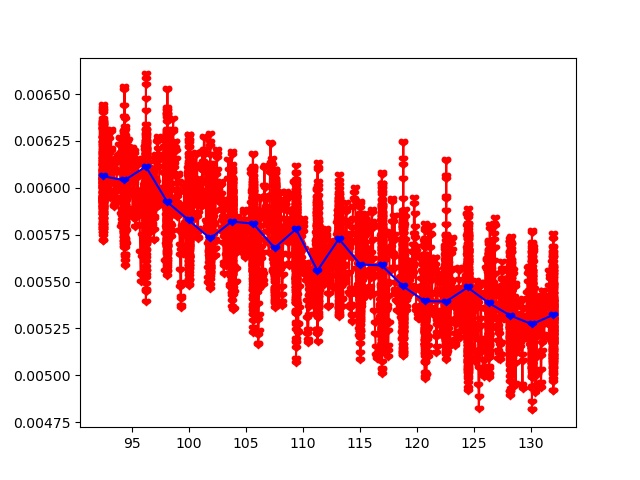

In [60]:
fig,ax = plt.subplots()
# ax2 = ax.twinx()
ax.plot(df_temp_sweep_3Hz['PPMS:T_pm'],df_temp_sweep_3Hz['dev5793:0:Y']*df_temp_sweep_3Hz['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax.plot(df_temp_sweep_3Hz_stable['PPMS:T_pm'],df_temp_sweep_3Hz_stable['dev5793:0:Y']*df_temp_sweep_3Hz_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='blue')


# ax2.plot(df_temp_sweep_3Hz_stable['SR830-1:Freq'],df_mfli_100K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

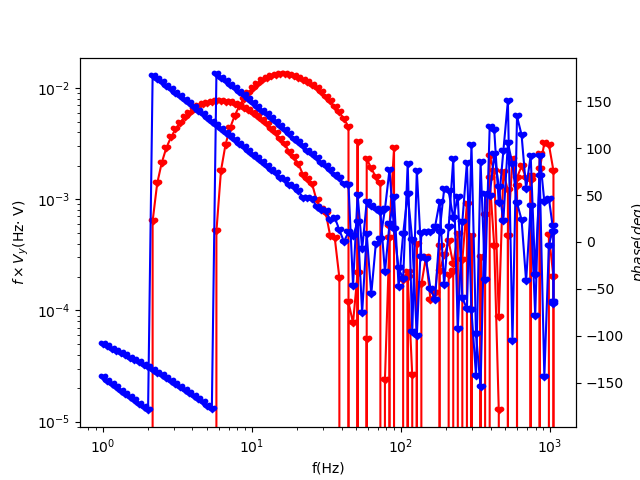

In [8]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax.loglog(df_mfli_20K_stable['SR830-1:Freq'],df_mfli_20K_stable['dev5793:0:Y']*df_mfli_20K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_mfli_20K_stable['SR830-1:Freq'],df_mfli_20K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

ax.loglog(df_mfli_50K_stable['SR830-1:Freq'],df_mfli_50K_stable['dev5793:0:Y']*df_mfli_50K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_mfli_50K_stable['SR830-1:Freq'],df_mfli_50K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

# ax.loglog(df_mfli_140K_stable['SR830-1:Freq'],df_mfli_140K_stable['dev5793:0:Y']*df_mfli_140K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
# ax2.plot(df_mfli_140K_stable['SR830-1:Freq'],df_mfli_140K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')


# ax.loglog(df_mfli_3K_stable['SR830-1:Freq'],df_mfli_3K_stable['dev5793:0:Y']*df_mfli_3K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
# ax2.plot(df_mfli_3K_stable['SR830-1:Freq'],df_mfli_3K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

# ax.loglog(df_860_h_stable['SR830-1:Freq'],df_860_h_stable['SR860-1:Y']*df_860_h_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
# ax2.plot(df_860_h_stable['SR830-1:Freq'],df_860_h_stable['SR860-1:Theta'],marker='$\u2764\uFE0F$',color='blue')
# # ax2.plot(df_mfli_100K['SR830-1:Freq'],df_mfli_100K['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')
ax.set_xlabel(r"f(Hz)")
ax.set_ylabel(r"$f\times V_y$(Hz$\cdot$ V)")
ax2.set_ylabel(r"$phase(deg)$")
plt.xscale('log')

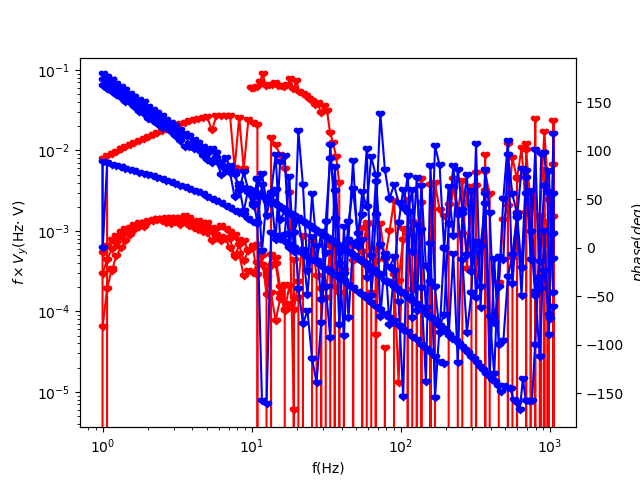

In [62]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax.loglog(df_mfli_100K_stable['SR830-1:Freq'],df_mfli_100K_stable['dev5793:0:Y']*df_mfli_100K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_mfli_100K_stable['SR830-1:Freq'],df_mfli_100K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

ax.loglog(df_mfli_120K_stable['SR830-1:Freq'],df_mfli_120K_stable['dev5793:0:Y']*df_mfli_120K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_mfli_120K_stable['SR830-1:Freq'],df_mfli_120K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

ax.loglog(df_mfli_140K_stable['SR830-1:Freq'],df_mfli_140K_stable['dev5793:0:Y']*df_mfli_140K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_mfli_140K_stable['SR830-1:Freq'],df_mfli_140K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')


ax.loglog(df_mfli_3K_stable['SR830-1:Freq'],df_mfli_3K_stable['dev5793:0:Y']*df_mfli_3K_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_mfli_3K_stable['SR830-1:Freq'],df_mfli_3K_stable['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')

ax.loglog(df_860_h_stable['SR830-1:Freq'],df_860_h_stable['SR860-1:Y']*df_860_h_stable['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2.plot(df_860_h_stable['SR830-1:Freq'],df_860_h_stable['SR860-1:Theta'],marker='$\u2764\uFE0F$',color='blue')
# ax2.plot(df_mfli_100K['SR830-1:Freq'],df_mfli_100K['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')
ax.set_xlabel(r"f(Hz)")
ax.set_ylabel(r"$f\times V_y$(Hz$\cdot$ V)")
ax2.set_ylabel(r"$phase(deg)$")
plt.xscale('log')

In [68]:
df_power_sweep

,sys:time,sys:real_time,PPMS:T_pm,PPMS:SetTemp,PPMS:H_pm,PPMS:SetField,SR830-1:Freq,SR830-1:Amp,AH:C_d,RP100:setVolt1_now,...,RP100:Output2,SR860-1:X,SR860-1:Y,SR860-1:R,SR860-1:Theta,dev5793:0:X,dev5793:0:Y,dev5793:0:R,dev5793:0:Theta,dev5793:0:Freq
0,10.783066,1.728803e+09,4.2538,2.5,-0.29,0.0,0.9506,1.000,1.054184,9.999622,...,0.0,1.519654e-06,4.083798e-07,0.000002,15.006678,4.087944e-04,0.007899,0.007910,87.037486,1.901265
1,13.605312,1.728803e+09,4.2538,2.5,-0.29,0.0,0.9506,1.000,1.054185,9.999622,...,0.0,-4.609354e-07,-1.256246e-06,0.000001,-110.134102,4.054322e-04,0.007900,0.007911,87.062221,1.901194
2,15.478497,1.728803e+09,4.2545,2.5,-0.29,0.0,0.9506,1.000,1.054184,9.999622,...,0.0,-5.351069e-07,1.097162e-06,0.000001,116.019974,4.075459e-04,0.007922,0.007932,87.054855,1.901221
3,17.388581,1.728803e+09,4.2554,2.5,-0.29,0.0,0.9506,1.000,1.054191,9.999622,...,0.0,1.784964e-06,3.980826e-07,0.000002,12.541772,4.094251e-04,0.007932,0.007942,87.045037,1.901278
4,19.331045,1.728803e+09,4.2560,2.5,-0.29,0.0,0.9506,1.000,1.054197,9.999622,...,0.0,3.312721e-07,-1.367775e-06,0.000001,-76.394829,4.071936e-04,0.007908,0.007919,87.052480,1.901171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1356.109241,1.728804e+09,4.5567,2.5,-0.29,0.0,11.2120,0.004,1.054230,9.999622,...,0.0,1.027579e-06,7.946352e-07,0.000001,37.680164,1.876624e-06,0.000004,0.000004,64.270742,22.423551
637,1358.415926,1.728804e+09,4.5575,2.5,-0.29,0.0,11.2120,0.004,1.054230,9.999622,...,0.0,5.609190e-07,-1.610445e-06,0.000002,-70.807777,-2.987479e-06,0.000001,0.000003,156.956937,22.423553
638,1360.374460,1.728804e+09,4.5577,2.5,-0.29,0.0,11.2120,0.004,1.054230,9.999622,...,0.0,-1.451521e-06,-2.405475e-07,0.000001,-170.551987,-4.742941e-06,0.000003,0.000005,151.332786,22.423546
639,1362.345120,1.728804e+09,4.5567,2.5,-0.29,0.0,11.2120,0.004,1.054229,9.999622,...,0.0,5.939740e-07,9.347071e-07,0.000001,57.537682,-2.289588e-06,0.000003,0.000004,128.913384,22.423553


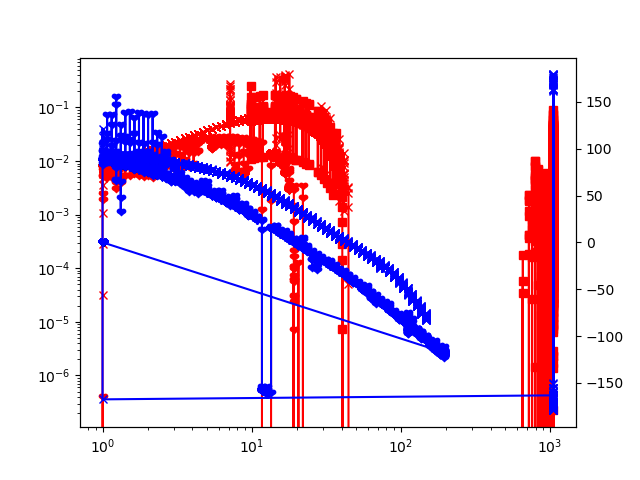

In [66]:
fig,ax = plt.subplots()
ax.loglog(df_860_h['SR830-1:Freq'],df_860_h['SR860-1:Y']*df_860_h['SR830-1:Freq'],marker='s',color='red')
ax.loglog(df_860['SR830-1:Freq'],df_860['SR860-1:Y']*df_860['SR830-1:Freq'],marker='x',color='red')
ax.loglog(df['SR830-1:Freq'],df['dev5793:0:Y']*df['SR830-1:Freq'],marker='$\u2764\uFE0F$',color='red')
ax2 = ax.twinx()
ax2.plot(df_860['SR830-1:Freq'],df_860['SR860-1:Theta'],marker='x',color='blue')
ax2.plot(df['SR830-1:Freq'],df['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')
plt.xscale('log')


Text(0, 0.5, '$V_Y$')

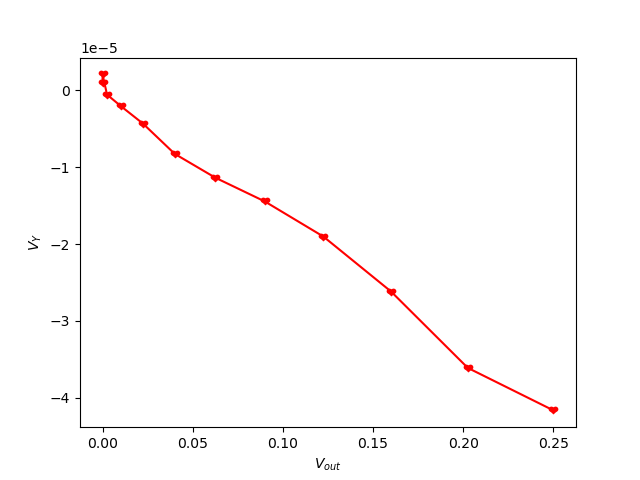

In [22]:
fig,ax = plt.subplots()

ax.plot(df_mfli_1p8K_stable['SR830-1:Amp'][:]**2,df_mfli_1p8K_stable['dev5793:0:X'][:],marker='$\u2764\uFE0F$',color='red')
# ax.plot(df_mfli_1p8K['SR830-1:Amp'][50:],df_mfli_1p8K['SR830-1:Amp'][50:]**2*0.00101,'--')
ax.set_xlabel(r'$V_{out}$')
ax.set_ylabel(r'$V_Y$')
# ax2 = ax.twinx()
# ax2.plot(df_860['SR830-1:Freq'],df_860['SR860-1:Theta'],marker='x',color='blue')
# ax2.plot(df['SR830-1:Freq'],df['dev5793:0:Theta'],marker='$\u2764\uFE0F$',color='blue')
# plt.xscale('log')

In [11]:
df_1 = read_idx(folder,118)

In [12]:
df_1

,sys:time,PPMS:T_pm,PPMS:H_pm,SR830-1:X,SR830-1:Y,SR830-1:R,SR830-1:Theta,KL2182:V,KL2182A1:V,KL2182A2:V,...,RP100:setVolt1,RP100:setVolt2,RP100:measVolt1,RP100:measVolt2,RP100:Output1,RP100:Output2,SR830-2:X,SR830-2:Y,SR830-2:R,SR830-2:Theta
0,15.370116,298.9899,-0.36,0.000712,0.001092,0.001092,67.056,-0.522156,-11.725066,-11.824344,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000145,0.001399,0.001406,84.060
1,17.562149,298.9771,-0.36,0.000712,0.001092,0.001092,67.062,-0.695698,-11.726870,-11.822394,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000145,0.001399,0.001406,84.060
2,19.349560,298.9630,-0.36,0.000712,0.001092,0.001092,67.056,-0.834385,-11.723629,-11.826590,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000145,0.001399,0.001406,84.060
3,21.207873,298.9450,-0.36,0.000712,0.001092,0.001092,67.056,-0.973338,-11.723139,-11.825990,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000145,0.001398,0.001406,84.066
4,23.622847,298.9130,-0.36,0.000712,0.001092,0.001092,67.056,-1.181473,-11.726294,-11.823829,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000145,0.001398,0.001406,84.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639,23906.900425,100.0822,-0.36,0.000429,0.001092,0.001092,73.920,-0.056829,-11.723594,-11.826239,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000135,0.001281,0.001289,83.970
11640,23909.661972,100.0633,-0.36,0.000429,0.001092,0.001092,73.926,-0.052186,-11.722840,-11.826365,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000135,0.001282,0.001289,83.970
11641,23911.459816,100.0466,-0.36,0.000429,0.001092,0.001092,73.926,-0.041457,-11.726631,-11.825220,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000135,0.001282,0.001289,83.970
11642,23913.313228,100.0277,-0.36,0.000429,0.001092,0.001092,73.926,-0.049668,-11.723936,-11.827417,...,-1.999557,10.000389,-4.882813,8.789063,1.0,1.0,0.000135,0.001281,0.001289,83.970


<IPython.core.display.Javascript object>


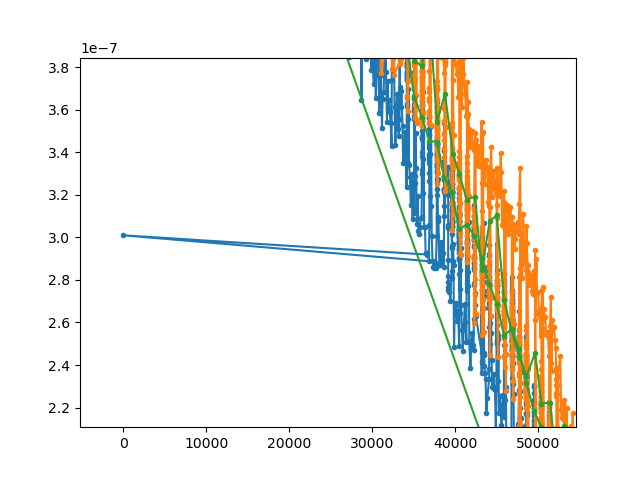

In [8]:
fig,ax = plt.subplots()
ax.plot(df['PPMS:H_pm'][:8222],df['KL2182:V'][:8222],'.-')
ax.plot(df['PPMS:H_pm'][8222:16535],df['KL2182:V'][8222:16535],'.-')
ax.plot(df_1['PPMS:H_pm'][:8222],df_1['KL2182:V'][:8222],'.-')


<IPython.core.display.Javascript object>


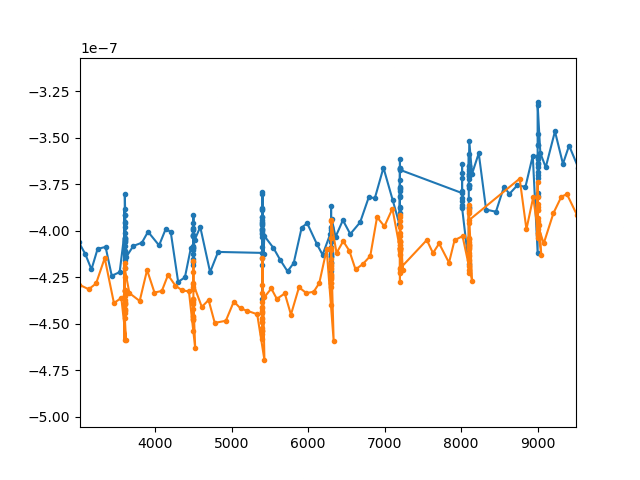

In [28]:
fig,ax = plt.subplots()
ax.plot(df['PPMS:H_pm'][:8222],df['KL2182A2:V'][:8222],'.-')
ax.plot(df['PPMS:H_pm'][8222:16535],df['KL2182A2:V'][8222:16535],'.-')

In [25]:
plt.plot(df['sys:time'][:8222],df['KL2182:V'][:8222])

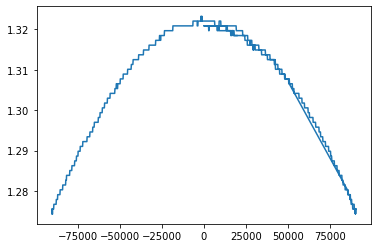

In [10]:
plt.plot(df['PPMS:H_pm'],df['SR830-2:X']/1e-4)

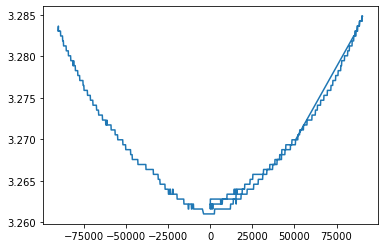

In [8]:
plt.plot(df['PPMS:H_pm'],df['SR830-1:X']/1e-4)